In [19]:
import pandas as pd
import sys
import matplotlib
%matplotlib inline

In [2]:
States = ['NY', 'NY', 'NY', 'NY', 'FL', 'FL', 'GA', 'GA', 'FL', 'FL'] 
data = [1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
idx = pd.date_range('1/1/2012', periods=10, freq='MS')
df1 = pd.DataFrame(data, index=idx, columns=['Revenue'])
df1['State'] = States

# Create a second dataframe
data2 = [10.0, 10.0, 9, 9, 8, 8, 7, 7, 6, 6]
idx2 = pd.date_range('1/1/2013', periods=10, freq='MS')
df2 = pd.DataFrame(data2, index=idx2, columns=['Revenue'])
df2['State'] = States
    
# Combine dataframes
df = pd.concat([df1,df2])
df

Revenue State
2012-01-01      1.0    NY
2012-02-01      2.0    NY
2012-03-01      3.0    NY
2012-04-01      4.0    NY
2012-05-01      5.0    FL
2012-06-01      6.0    FL
2012-07-01      7.0    GA
2012-08-01      8.0    GA
2012-09-01      9.0    FL
2012-10-01     10.0    FL
2013-01-01     10.0    NY
2013-02-01     10.0    NY
2013-03-01      9.0    NY
2013-04-01      9.0    NY
2013-05-01      8.0    FL
2013-06-01      8.0    FL
2013-07-01      7.0    GA
2013-08-01      7.0    GA
2013-09-01      6.0    FL
2013-10-01      6.0    FL

In [4]:
# Method 1

# make a copy of original df
newdf = df.copy()

newdf['x-Mean'] = abs(newdf['Revenue'] - newdf['Revenue'].mean())
newdf['1.96*std'] = 1.96*newdf['Revenue'].std()  
newdf['Outlier'] = abs(newdf['Revenue'] - newdf['Revenue'].mean()) > 1.96*newdf['Revenue'].std()
newdf

Revenue State  x-Mean  1.96*std Outlier
2012-01-01      1.0    NY    5.75  5.200273    True
2012-02-01      2.0    NY    4.75  5.200273   False
2012-03-01      3.0    NY    3.75  5.200273   False
2012-04-01      4.0    NY    2.75  5.200273   False
2012-05-01      5.0    FL    1.75  5.200273   False
2012-06-01      6.0    FL    0.75  5.200273   False
2012-07-01      7.0    GA    0.25  5.200273   False
2012-08-01      8.0    GA    1.25  5.200273   False
2012-09-01      9.0    FL    2.25  5.200273   False
2012-10-01     10.0    FL    3.25  5.200273   False
2013-01-01     10.0    NY    3.25  5.200273   False
2013-02-01     10.0    NY    3.25  5.200273   False
2013-03-01      9.0    NY    2.25  5.200273   False
2013-04-01      9.0    NY    2.25  5.200273   False
2013-05-01      8.0    FL    1.25  5.200273   False
2013-06-01      8.0    FL    1.25  5.200273   False
2013-07-01      7.0    GA    0.25  5.200273   False
2013-08-01      7.0    GA    0.25  5.200273   False
2013-09-01      6.0    FL    0.75  5.200273   False
2013-10-01      6.0    FL    0.75  5.200273   False

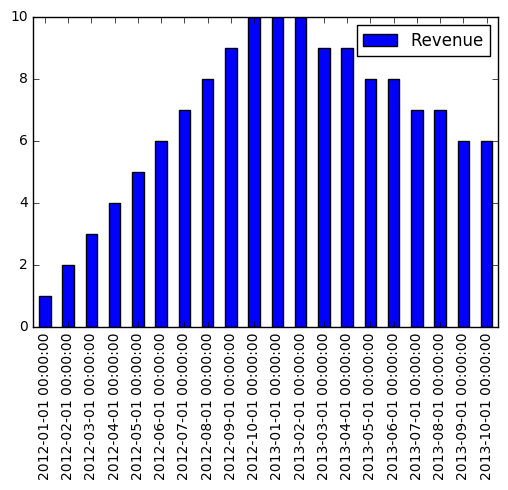

In [23]:
df.plot.bar()

In [10]:
newdf = df.copy()

State = newdf.groupby('State')

newdf['Lower'] = State['Revenue'].transform( lambda x: x.quantile(q=.25) - (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf['Upper'] = State['Revenue'].transform( lambda x: x.quantile(q=.75) + (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf['Outlier'] = (newdf['Revenue'] < newdf['Lower']) | (newdf['Revenue'] > newdf['Upper']) 
newdf

Revenue State  Lower   Upper Outlier
2012-01-01      1.0    NY -7.000  19.000   False
2012-02-01      2.0    NY -7.000  19.000   False
2012-03-01      3.0    NY -7.000  19.000   False
2012-04-01      4.0    NY -7.000  19.000   False
2012-05-01      5.0    FL  2.625  11.625   False
2012-06-01      6.0    FL  2.625  11.625   False
2012-07-01      7.0    GA  6.625   7.625   False
2012-08-01      8.0    GA  6.625   7.625    True
2012-09-01      9.0    FL  2.625  11.625   False
2012-10-01     10.0    FL  2.625  11.625   False
2013-01-01     10.0    NY -7.000  19.000   False
2013-02-01     10.0    NY -7.000  19.000   False
2013-03-01      9.0    NY -7.000  19.000   False
2013-04-01      9.0    NY -7.000  19.000   False
2013-05-01      8.0    FL  2.625  11.625   False
2013-06-01      8.0    FL  2.625  11.625   False
2013-07-01      7.0    GA  6.625   7.625   False
2013-08-01      7.0    GA  6.625   7.625   False
2013-09-01      6.0    FL  2.625  11.625   False
2013-10-01      6.0    FL  2.625  11.625   False

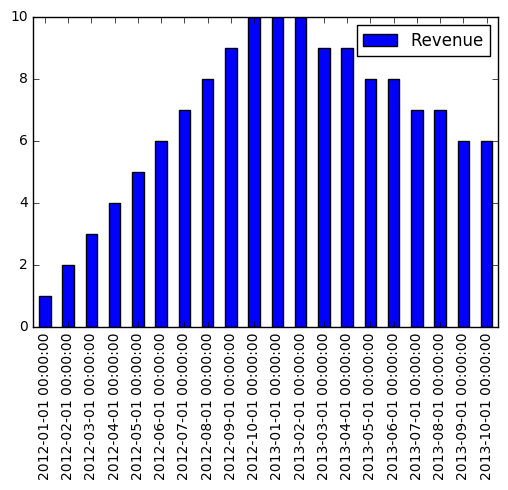

In [22]:
df.plot.bar()